In [2]:
import pandas as pd


In [3]:
df = pd.read_csv('monthly-beer-production.csv')
df.head()


,Date,Monthly beer production
0,1956-01-01,93.2
1,1956-02-01,96.0
2,1956-03-01,95.2
3,1956-04-01,77.1
4,1956-05-01,70.9


<font color='red'>Question:</font> What is the type of **Date**?

In [4]:
df.Date.dtype

dtype('O')

In [5]:
df.columns = ['Date', 'Beer_Production']
df.head()

,Date,Beer_Production
0,1956-01-01,93.2
1,1956-02-01,96.0
2,1956-03-01,95.2
3,1956-04-01,77.1
4,1956-05-01,70.9


<font color='red'>Assignment:</font> Use **pandas.to_datetime** to **transform df.Date** in to a series of datetime object and assign it to a new column **date**.

In [6]:
import datetime 
df['date']=pd.to_datetime(df.Date,format='%Y-%m-%d')
df


,Date,Beer_Production,date
0,1956-01-01,93.2,1956-01-01
1,1956-02-01,96.0,1956-02-01
2,1956-03-01,95.2,1956-03-01
3,1956-04-01,77.1,1956-04-01
4,1956-05-01,70.9,1956-05-01
...,...,...,...
471,1995-04-01,127.0,1995-04-01
472,1995-05-01,151.0,1995-05-01
473,1995-06-01,130.0,1995-06-01
474,1995-07-01,119.0,1995-07-01


The earliest date in the series is 1956-01-01.

<font color='red'>Assignment:</font> What is the earliest date in the datetime series.

In [ ]:
df.date.dtype

dtype('<M8[ns]')

In [ ]:
#Assuming the dates are arranged in the ordered way, and by looking at the dataframe, it seems that the earliest date is 1956-01-01.
print(df.Date[0])


oldest = df['date'].min() # Earliest date
newest = df['date'].max() # Latest date

print(oldest)

1956-01-01
1956-01-01 00:00:00


In [ ]:
print(df.Date[475])

1995-08-01


In [2]:
#set date as index
# df.set_index('Date', inplace=True)


In [10]:
df.drop(columns='date',inplace=True)
df

,Beer_Production
Date,
1956-01-01,93.2
1956-02-01,96.0
1956-03-01,95.2
1956-04-01,77.1
1956-05-01,70.9
...,...
1995-04-01,127.0
1995-05-01,151.0
1995-06-01,130.0


<font color='red'>Assignment:</font> What is the latest date in the datetime series.

In [ ]:
print(newest)

1995-08-01 00:00:00


In [ ]:
print(df['Date'].max())

1995-08-01


**Example**: Visualize the time series of 'Monthly beer production'.

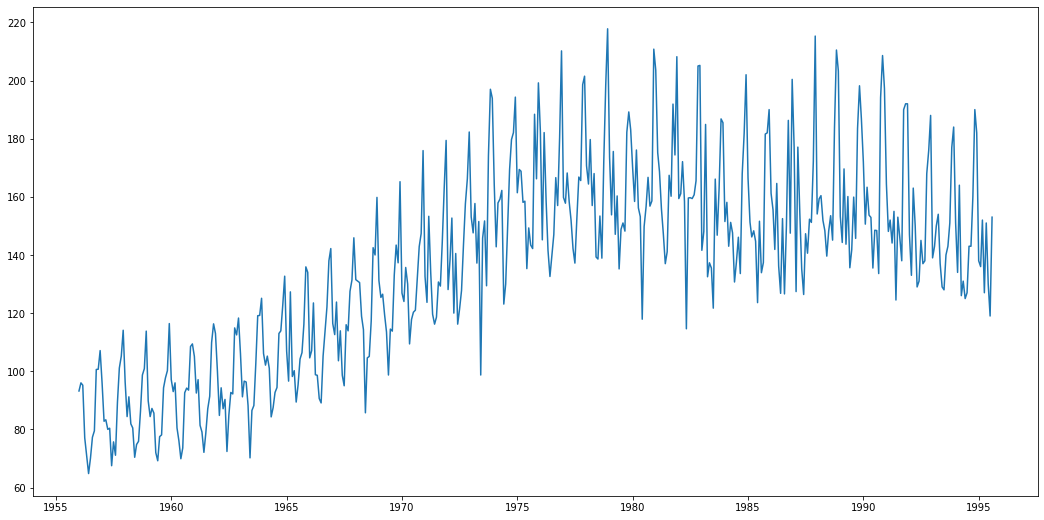

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
df.set_index('date', drop=True, inplace=True)
plt.figure(figsize=(18,9))
plt.plot(df.index, df["Monthly beer production"], linestyle="-")
plt.xlabel=('Dates')
plt.ylabel=('Total Production')
plt.show();

**Example**: Get yearly counts of data using **Resample**.

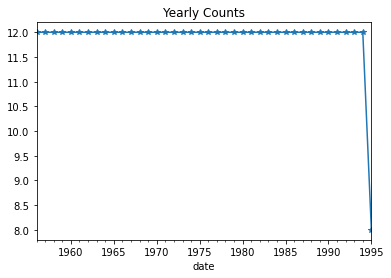

In [ ]:
df['Monthly beer production'].resample('Y').count().plot(title='Yearly Counts', marker='*')

<font color='red'>Assignment:</font> Get yearly mean and median, respectively.

In [ ]:
 # create year variable
dt.select$year <- format(dt.select[1],"%Y")
# aggregate
Annual.Ave <- aggregate(dt.select[-c(1,2)], df["year"],
                    mean, na.rm = TRUE)

SyntaxError: ignored

**Example:**</font> Get 12-month rolling moving average.

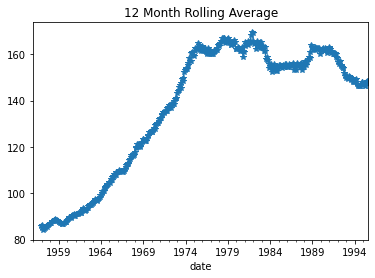

In [ ]:
df['Monthly beer production'].rolling(12).mean().plot(title='12 Month Rolling Average', marker='*')

<font color='red'>Assignment:</font> Plot seasonal decomposition of monthly beer production.

In [1]:
# from statsmodels.tsa.seasonal import seasonal_decompose
# # decomposition = seasonal_decompose(ts_log)
# decompose_data = seasonal_decompose(df, model="multiplicative")
# # decompose_data.plot(); 

In [ ]:
# split data into training data and test data
train_data = df[:len(df)-12]
test_data = df[len(df)-12:]

<font color='red'>Assignment:</font> use auto_arima to find the best (p, d, q) (P, D, Q) and forecast beer production for the last 12 months.

In [ ]:

# grid search ARIMA parameters for time series
import warnings
from math import sqrt
from pandas import read_csv
from pandas import datetime
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
 
# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(X, arima_order):
	# prepare training dataset
	train_size = int(len(X) * 0.66)
	train, test = X[0:train_size], X[train_size:]
	history = [x for x in train]
	# make predictions
	predictions = list()
	for t in range(len(test)):
		model = ARIMA(history, order=arima_order)
		model_fit = model.fit()
		yhat = model_fit.forecast()[0]
		predictions.append(yhat)
		history.append(test[t])
	# calculate out of sample error
	rmse = sqrt(mean_squared_error(test, predictions))
	return rmse
 
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
	dataset = dataset.astype('float32')
	best_score, best_cfg = float("inf"), None
	for p in p_values:
		for d in d_values:
			for q in q_values:
				order = (p,d,q)
				try:
					rmse = evaluate_arima_model(dataset, order)
					if rmse < best_score:
						best_score, best_cfg = rmse, order
					print('ARIMA%s RMSE=%.3f' % (order,rmse))
				except:
					continue
	print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))
 
# load dataset
def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')
series = read_csv('shampoo-sales.csv', header=0, index_col=0, parse_dates=True, squeeze=True, date_parser=parser)
# evaluate parameters
p_values = [0, 1, 2, 4, 6, 8, 10]
d_values = range(0, 3)
q_values = range(0, 3)
warnings.filterwarnings("ignore")
evaluate_models(series.values, p_values, d_values, q_values)

The default notation for ARIMA is a model with parameters p, d, and q, whereby each parameter takes an integer value:

d (differencing): In the case of a non-stationary time series, there is a chance to remove a trend from the data by differencing once or several times, thus bringing the data to a stationary state. The model parameter d determines the order of the differentiation. A value of d = 0 simplifies the ARIMA model to an ARMA model, lacking the integration aspect. If this is the case, we do not need to integrate the function because the time series is already stationary.
p (order of the AR terms): The autoregressive process describes the dependent relationship between an observation and several lagged observations (lags). Predictions are then based on past data from the same time series using linear functions. p = 1 means that the model uses values that lag by one period.
q (order of the MA terms): The parameter q determines the number of lagged forecast errors in the prediction equation. In contrast to the AR process, the MA process assumes that values at a future point in time depend on the errors made by predictions at current and past points in time. This means that it is not previous events that determine the predictions but rather the previous estimation or prediction errors used to calculate the following time series value.


<font color='red'>Assignment:</font> visualize your forecast by plotting it together with the true values.

In [ ]:
# plot the last 100 months only
plt.figure(figsize=(18,9))
df[-100:]['Monthly beer production'].plot(label="True values")
### add your code here


In [ ]:
# Decompose the time series
# plt.rcParams["figure.figsize"] = (10,6)
# result = seasonal_decompose(df['beer'], model='multiplicative', period = 12)
# result.plot()
# plt.show()

In [ ]:
# Decompose the time series
# plt.rcParams["figure.figsize"] = (10,6)
# result = seasonal_decompose(df['beer'], model='multiplicative', period = 12)
# result.plot()
# plt.show()